# Assignnement 2 : Randomized Optimization

## Counts Ones

In [2]:
import mlrose_hiive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

seed =7

In [2]:

# Counts Ones problem


#Fitness function
fitness = mlrose_hiive.OneMax()

#Definning the problem
problem = mlrose_hiive.DiscreteOpt(length = 100, fitness_fn = fitness, maximize = True, max_val = 2)


rhc = mlrose_hiive.RHCRunner(problem=problem,
                       experiment_name="RCH_final",
                       seed=seed,
                       iteration_list=50 * np.arange(20),
                       max_attempts=100,
                       restart_list=[0])
rhc_run_stats, rhc_run_curves = rhc.run()


schedule = mlrose_hiive.ExpDecay()

temperature_list= [0.1, 1, 10, 100]
sa = mlrose_hiive.SARunner(problem=problem,
                     experiment_name="SA_final",
                     seed=seed,
                     iteration_list=50 * np.arange(20),
                     max_attempts=100,
                     temperature_list=temperature_list,
                     decay_list=[mlrose_hiive.ExpDecay])
sa_run_stats, sa_run_curves = sa.run()


ga = mlrose_hiive.GARunner(problem=problem,
                     experiment_name="GA_final",
                     seed=seed,
                     iteration_list=50 * np.arange(20),
                     max_attempts=100,
                     population_sizes=[10],
                     mutation_rates=[0.05])
ga_run_stats, ga_run_curves = ga.run()

mimic = mlrose_hiive.MIMICRunner(problem=problem,
                           experiment_name="MIMIC_final",
                           seed=seed,
                           iteration_list=50 * np.arange(20),
                           population_sizes=[10],
                           max_attempts=100,
                           keep_percent_list=[0.2],
                           use_fast_mimic=True)
mimic_run_stats, mimic_run_curves = mimic.run()



Text(0.5, 1.0, 'Fitness curves')

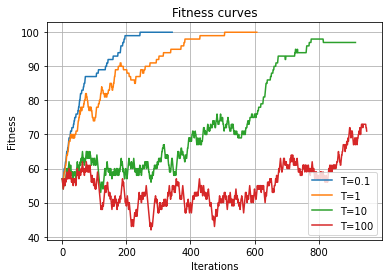

In [3]:
ax = sa_run_curves[sa_run_curves.Temperature.astype(str)=='0.1'].plot(x='Iteration' , y='Fitness',grid =True)
sa_run_curves[sa_run_curves.Temperature.astype(str)=='1'].plot(x='Iteration' , y='Fitness',ax =ax,grid =True)
sa_run_curves[sa_run_curves.Temperature.astype(str)=='10'].plot(x='Iteration' , y='Fitness',ax =ax,grid =True)
sa_run_curves[sa_run_curves.Temperature.astype(str)=='100'].plot(x='Iteration' , y='Fitness',ax =ax,grid =True)
ax.legend(['T=0.1', 'T=1', 'T=10','T=100'])
ax.set_xlabel('Iterations')
ax.set_ylabel('Fitness')
ax.set_title('Fitness curves')

Text(0.5, 1.0, 'Fitness curves')

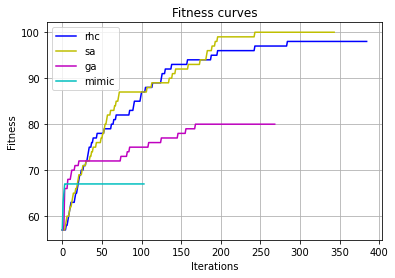

In [6]:
ax = rhc_run_curves.plot(x='Iteration' , y='Fitness',grid =True,color = 'b')
sa_run_curves[sa_run_curves.Temperature.astype(str)=='0.1'].plot(x='Iteration' , y='Fitness',ax =ax,color='y',grid =True)
ga_run_curves.plot(x='Iteration' , y='Fitness',ax =ax,color='m',grid =True)
mimic_run_curves.plot(x='Iteration' , y='Fitness',ax =ax,color='c',grid =True)
ax.legend(['rhc', 'sa', 'ga','mimic'])
ax.set_xlabel('Iterations')
ax.set_ylabel('Fitness')
ax.set_title('Fitness curves')

Text(0, 0.5, 'Time')

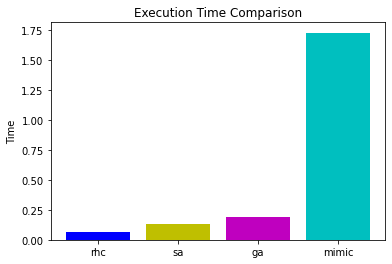

In [7]:
plt.bar(['rhc','sa','ga','mimic'],
        [rhc_run_curves.iloc[-1].Time,
         sa_run_curves.iloc[-1].Time,
         ga_run_curves.iloc[-1].Time,
         mimic_run_curves.iloc[-1].Time],
        color =['b','y','m','c'],
        )
plt.title('Execution Time Comparison') 
plt.ylabel('Time')


## 4-Peaks problem

In [72]:
fitness = mlrose_hiive.FourPeaks(t_pct=0.2)

problem = mlrose_hiive.DiscreteOpt(length=50, fitness_fn=fitness, maximize=True, max_val=2)




rhc = mlrose_hiive.RHCRunner(problem=problem,
                       experiment_name="RCH_final",
                       seed=seed,
                       iteration_list=[5000],
                       max_attempts=1000,
                       restart_list=[0])
rhc_run_stats, rhc_run_curves = rhc.run()

sa = mlrose_hiive.SARunner(problem=problem,
                     experiment_name="SA_final",
                     seed=seed,
                     iteration_list=[10000],
                     max_attempts=1000,
                     temperature_list=[1],
                     decay_list=[mlrose_hiive.ExpDecay])
sa_run_stats, sa_run_curves = sa.run()

mutation_rates=[0,0.2,0.4,0.6,0.8,1]
population_sizes=[10,100,250,500,1000]
ga = mlrose_hiive.GARunner(problem=problem,
                     experiment_name="GA_final",
                     seed=seed,
                     iteration_list=[5000],
                     max_attempts=100,
                     population_sizes=[250],
                     mutation_rates=[0.4])
ga_run_stats, ga_run_curves = ga.run()


mimic = mlrose_hiive.MIMICRunner(problem=problem,
                           experiment_name="MIMIC_final",
                           seed=seed,
                           iteration_list=[5000],
                           population_sizes=[200],
                           max_attempts=1000,
                           keep_percent_list=[0.2],
                           use_fast_mimic=True)
mimic_run_stats, mimic_run_curves = mimic.run()



In [73]:
ga_run_curves

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.003258,4.0,250.0,250,0.4,5000
1,1,0.017525,13.0,502.0,250,0.4,5000
2,2,0.030562,13.0,753.0,250,0.4,5000
3,3,0.043846,13.0,1004.0,250,0.4,5000
4,4,0.057232,13.0,1255.0,250,0.4,5000
...,...,...,...,...,...,...,...
148,148,2.147860,89.0,37418.0,250,0.4,5000
149,149,2.162364,89.0,37669.0,250,0.4,5000
150,150,2.177302,89.0,37920.0,250,0.4,5000
151,151,2.191853,89.0,38171.0,250,0.4,5000


(0.0, 100.0)

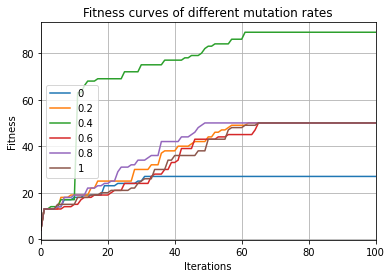

In [63]:
ax = ga_run_curves[ga_run_curves['Mutation Rate']==0].plot(x='Iteration' , y='Fitness',grid =True)
for x in mutation_rates[1:] :
    ga_run_curves[ga_run_curves['Mutation Rate']==x].plot(x='Iteration' , y='Fitness',ax=ax,grid =True)
ax.legend(mutation_rates)
ax.set_xlabel('Iterations')
ax.set_ylabel('Fitness')
ax.set_title('Fitness curves of different mutation rates')
ax.set_xlim(0,100)



Text(0.5, 1.0, 'Fitness curves of different population sizes')

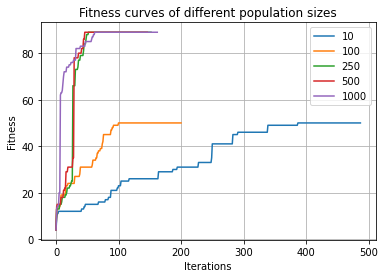

In [70]:

ax = ga_run_curves[ga_run_curves['Population Size']==10].plot(x='Iteration' , y='Fitness',grid =True)
for x in population_sizes[1:] :
    ga_run_curves[ga_run_curves['Population Size']==x].plot(x='Iteration' , y='Fitness',ax=ax,grid =True)
ax.legend(population_sizes)
ax.set_xlabel('Iterations')
ax.set_ylabel('Fitness')
ax.set_title('Fitness curves of different population sizes')


Text(0.5, 1.0, 'Fitness curves')

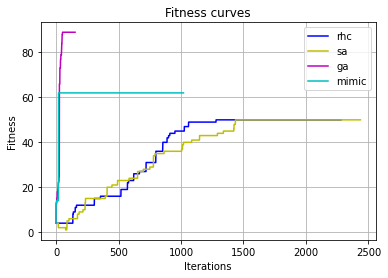

In [74]:
ax = rhc_run_curves.plot(x='Iteration' , y='Fitness',grid =True,color = 'b')
sa_run_curves.plot(x='Iteration' , y='Fitness',ax =ax,color='y',grid =True)
ga_run_curves.plot(x='Iteration' , y='Fitness',ax =ax,color='m',grid =True)
mimic_run_curves.plot(x='Iteration' , y='Fitness',ax =ax,color='c',grid =True)
ax.legend(['rhc', 'sa', 'ga','mimic'])
ax.set_xlabel('Iterations')
ax.set_ylabel('Fitness')
ax.set_title('Fitness curves')

Text(0, 0.5, 'Time')

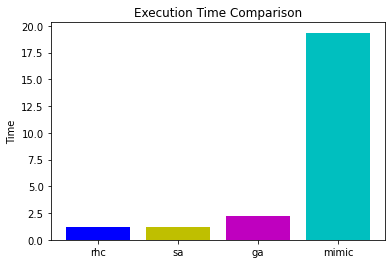

In [75]:
plt.bar(['rhc','sa','ga','mimic'],[rhc_run_curves.iloc[-1].Time,sa_run_curves.iloc[-1].Time,ga_run_curves.iloc[-1].Time,mimic_run_curves.iloc[-1].Time],color =['b','y','m','c'])
plt.title('Execution Time Comparison') 
plt.ylabel('Time')

## Traveling Salesperson Problem

In [3]:
import mlrose_hiive
import numpy as np
import random

# Create list of city coordinates
coords_list = [(1, 1), (4, 2), (5, 2), (6, 4), (4, 4), (3, 6), (1, 5), (2, 3),(6, 5), (2, 7)]

# Initialize fitness function object using coords_list
fitness_coords = mlrose_hiive.TravellingSales(coords = coords_list)

# Define optimization problem object
problem = mlrose_hiive.TSPOpt(length = 10, fitness_fn = fitness_coords, maximize=False)

rhc = mlrose_hiive.RHCRunner(problem=problem,
                       experiment_name="RCH_final",
                       seed=seed,
                       iteration_list=[5000],
                       max_attempts=100,
                       restart_list=[0])
rhc_run_stats, rhc_run_curves = rhc.run()


sa = mlrose_hiive.SARunner(problem=problem,
                     experiment_name="SA_final",
                     seed=seed,
                     iteration_list=[5000],
                     max_attempts=100,
                     temperature_list=[1],
                     decay_list=[mlrose_hiive.ExpDecay])
sa_run_stats, sa_run_curves = sa.run()


ga = mlrose_hiive.GARunner(problem=problem,
                     experiment_name="GA_final",
                     seed=seed,
                     iteration_list=[5000],
                     max_attempts=100,
                     population_sizes=[10],
                     mutation_rates=[0.1])
ga_run_stats, ga_run_curves = ga.run()


mimic = mlrose_hiive.MIMICRunner(problem=problem,
                           experiment_name="MIMIC_final",
                           seed=seed,
                           iteration_list=[5000],
                           population_sizes=[1000],
                           max_attempts=100,
                           keep_percent_list=[0.5],
                           use_fast_mimic=True)
mimic_run_stats, mimic_run_curves = mimic.run()


In [52]:
mimic_run_curves

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0,0.038378,37.676184,1000.0,True,1000,0.1,5000
1,1,0.569157,21.520763,2002.0,True,1000,0.1,5000
2,2,1.096814,20.683041,3004.0,True,1000,0.1,5000
3,3,1.559039,20.683041,4005.0,True,1000,0.1,5000
4,4,2.005971,20.683041,5006.0,True,1000,0.1,5000
...,...,...,...,...,...,...,...,...
98,98,44.311449,20.683041,99100.0,True,1000,0.1,5000
99,99,44.763737,20.683041,100101.0,True,1000,0.1,5000
100,100,45.212079,20.683041,101102.0,True,1000,0.1,5000
101,101,45.656534,20.683041,102103.0,True,1000,0.1,5000


Text(0.5, 1.0, 'Fitness curves')

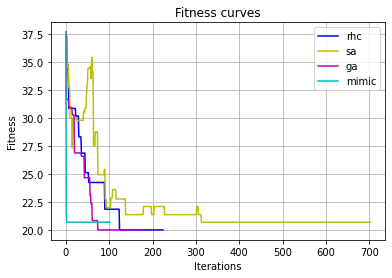

In [53]:
ax = rhc_run_curves.plot(x='Iteration' , y='Fitness',grid =True,color = 'b')
sa_run_curves.plot(x='Iteration' , y='Fitness',ax =ax,color='y',grid =True)
ga_run_curves.plot(x='Iteration' , y='Fitness',ax =ax,color='m',grid =True)
mimic_run_curves.plot(x='Iteration' , y='Fitness',ax =ax,color='c',grid =True)
ax.legend(['rhc', 'sa', 'ga','mimic'])
ax.set_xlabel('Iterations')
ax.set_ylabel('Fitness')
ax.set_title('Fitness curves')
#ax.set_xlim(-10,200)

Text(0, 0.5, 'Time')

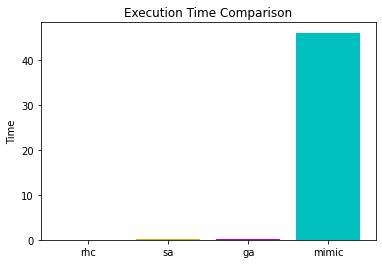

In [59]:
plt.bar(['rhc','sa','ga','mimic'],[rhc_run_curves.iloc[-1].Time,sa_run_curves.iloc[-1].Time,ga_run_curves.iloc[-1].Time,mimic_run_curves.iloc[-1].Time],color =['b','y','m','c'])
plt.title('Execution Time Comparison') 
plt.ylabel('Time')

## Neural network weights

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


data = pd.read_csv('archive/churn-bigml-80.csv')
data_test = pd.read_csv('archive/churn-bigml-20.csv')



data['Churn']=LabelEncoder().fit_transform(data['Churn'])




features = ['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls']

y=data['Churn']
X=data[features]

y_test=data_test['Churn']
X_test=data_test[features]

s = (X.dtypes == 'object')
object_cols = list(s[s].index)


# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(X[object_cols]))

OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test[object_cols]))

# One-hot encoding removed index; put it back
OH_cols.index = X.index
OH_cols_test.index = X_test.index

# Remove categorical columns (will replace with one-hot encoding)
num_X = X.drop(object_cols, axis=1)
num_X_test = X_test.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
X = pd.concat([num_X, OH_cols], axis=1)
X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

X.columns=X.columns.astype(str)
X_test.columns=X.columns.astype(str)

In [16]:
nn_model_grad_desc = mlrose_hiive.NeuralNetwork(hidden_nodes = [64,64,64], activation = 'relu', \
                                 algorithm = 'gradient_descent', max_iters = 1000, \
                                 bias = True, is_classifier = True, learning_rate = 0.001, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 7)

nn_model_grad_desc.fit(X, y)

pred_y=nn_model_grad_desc.predict(X)


print('---------- Gradient Descent :')
print('training data Accuracy: %.3f' % accuracy_score(y, pred_y))

pred_y_test=nn_model_grad_desc.predict(X_test)
print('Testing data Accuracy: %.3f' % accuracy_score(y_test, pred_y_test))


---------- Gradient Descent :
training data Accuracy: 0.854
Testing data Accuracy: 0.858


In [26]:
nn_model_rhs = mlrose_hiive.NeuralNetwork(hidden_nodes = [64,64,64], activation = 'relu', \
                                 algorithm = 'random_hill_climb', max_iters = 1000,restarts=10, \
                                 bias = True, is_classifier = True, learning_rate = 0.001, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 7)

nn_model_rhs.fit(X, y)

pred_y_rhs=nn_model_rhs.predict(X)


print('---------- Random Hill Climb :')
print('training data Accuracy: %.3f' % accuracy_score(y, pred_y_rhs))

pred_y_test_rhs=nn_model1.predict(X_test)
print('Testing data Accuracy: %.3f' % accuracy_score(y_test, pred_y_test_rhs))


---------- Random Hill Climb :
training data Accuracy: 0.854
Testing data Accuracy: 0.142


In [19]:
nn_model_sa = mlrose_hiive.NeuralNetwork(hidden_nodes = [64,64,64], activation = 'relu', \
                                 algorithm = 'genetic_alg', max_iters = 1000, \
                                 bias = True, is_classifier = True, learning_rate = 0.001, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 7)

nn_model_sa.fit(X, y)

pred_y_sa=nn_model_sa.predict(X)


print('---------- Genetic algorithms :')
print('training data Accuracy: %.3f' % accuracy_score(y, pred_y_sa))

pred_y_test_sa=nn_model_sa.predict(X_test)
print('Testing data Accuracy: %.3f' % accuracy_score(y_test, pred_y_test_sa))

---------- Genetic algorithms :
training data Accuracy: 0.869
Testing data Accuracy: 0.877


In [31]:
nn_model_ga = mlrose_hiive.NeuralNetwork(hidden_nodes = [64,64,64], activation = 'relu', \
                                 algorithm = 'simulated_annealing', max_iters = 1000, \
                                 bias = True, is_classifier = True, learning_rate = 0.0001, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 3)

nn_model_ga.fit(X, y)

pred_y_ga=nn_model_ga.predict(X)


print('---------- Simulated annealing :')
print('training data Accuracy: %.3f' % accuracy_score(y, pred_y_ga))

pred_y_test_ga=nn_model_ga.predict(X_test)
print('Testing data Accuracy: %.3f' % accuracy_score(y_test, pred_y_test_ga))

---------- Simulated annealing :
training data Accuracy: 0.146
Testing data Accuracy: 0.142
